## Getting the data

We will work with the first subject
of the brain development :term:`fMRI` data set.
dataset.func is a list of filenames. We select the 1st (0-based)
subject by indexing with [0]).



In [ ]:
# !pip install nilearn
# !pip install numpy 
# !pip install --upgrade matplotlib ipywidgets ipympl
# !pip install tvb-library
# !pip install tvb-data
# !pip install tvb-widgets


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tvb.simulator.lab import connectivity, models, monitors, simulator, equations, cortex

In [2]:

# 1. Define connectivity
conn = connectivity.Connectivity.from_file('connectivity_76.zip')

conn


2025-05-22 12:20:58,050 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.


In [3]:

# 2. Select neural model (e.g., ReducedWongWang)
oscillator = models.ReducedWongWang(tau_s=np.array([1.0]))
oscillator

In [69]:

# 3. Configure BOLD monitor
bold_mon = monitors.Bold(
    period = 0.72, 
    hrf_kernel = equations.Gamma(),
    hrf_length = 32
    )
bold_mon

2025-04-29 15:26:48,721 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
(1388,) (1388, 76) 0.72021484375 999.658203125 0.72021484375


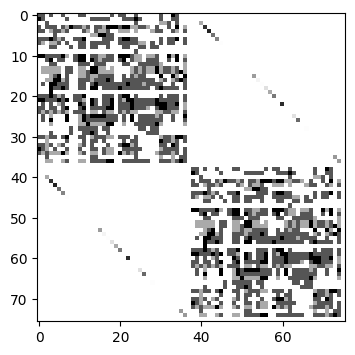

In [ ]:

# {delay=6.0,      # Peak response delay (seconds)
# under_delay=16, # Undershoot timing
# ratio=6.0       # Undershoot/peak ratio
# }

sim = simulator.Simulator(
    connectivity = conn,
    model = oscillator,
    monitors = [bold_mon],
    simulation_length = 1000
).configure()

(t, y), = sim.run()
y = y[:, 0, :, 0]

print(t.shape, y.shape, t[0], t[-1], t[1]-t[0])

plt.figure(figsize=(4, 4))
plt.imshow(conn.weights, cmap='binary', interpolation='none')
plt.show()

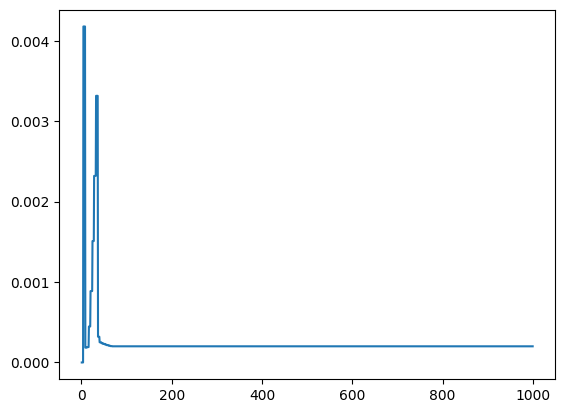

In [54]:
roi = 50
plt.figure(1)
plt.plot(t, y[:, roi])
plt.show()

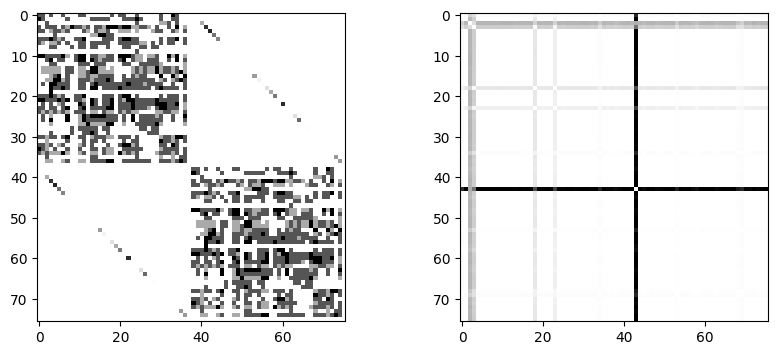

In [71]:
C = np.corrcoef(y.T)
plt.figure(figsize=(10, 4))
plt.subplot(121), plt.imshow(conn.weights, cmap='binary', interpolation='none')
plt.subplot(122), plt.imshow(C, cmap='gray', interpolation='none');
plt.show()

In [72]:
ctx = cortex.Cortex.from_file()
ctx.region_mapping_data.connectivity = conn
rm = ctx.region_mapping


n_points = len(rm)
print(n_points, np.unique(rm))
n_rois = len(conn.ordered_labels)
print(n_rois)



16384 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75]
76


['lA1' 'lA2' 'lAMYG' 'lCCA' 'lCCP' 'lCCR' 'lCCS' 'lFEF' 'lG' 'lHC' 'lIA'
 'lIP' 'lM1' 'lPCI' 'lPCIP' 'lPCM' 'lPCS' 'lPFCCL' 'lPFCDL' 'lPFCDM'
 'lPFCM' 'lPFCORB' 'lPFCPOL' 'lPFCVL' 'lPHC' 'lPMCDL' 'lPMCM' 'lPMCVL'
 'lS1' 'lS2' 'lTCC' 'lTCI' 'lTCPOL' 'lTCS' 'lTCV' 'lV1' 'lV2' 'lCC' 'rA1'
 'rA2' 'rAMYG' 'rCCA' 'rCCP' 'rCCR' 'rCCS' 'rFEF' 'rG' 'rHC' 'rIA' 'rIP'
 'rM1' 'rPCI' 'rPCIP' 'rPCM' 'rPCS' 'rPFCCL' 'rPFCDL' 'rPFCDM' 'rPFCM'
 'rPFCORB' 'rPFCPOL' 'rPFCVL' 'rPHC' 'rPMCDL' 'rPMCM' 'rPMCVL' 'rS1' 'rS2'
 'rTCC' 'rTCI' 'rTCPOL' 'rTCS' 'rTCV' 'rV1' 'rV2' 'rCC']
0
57.0


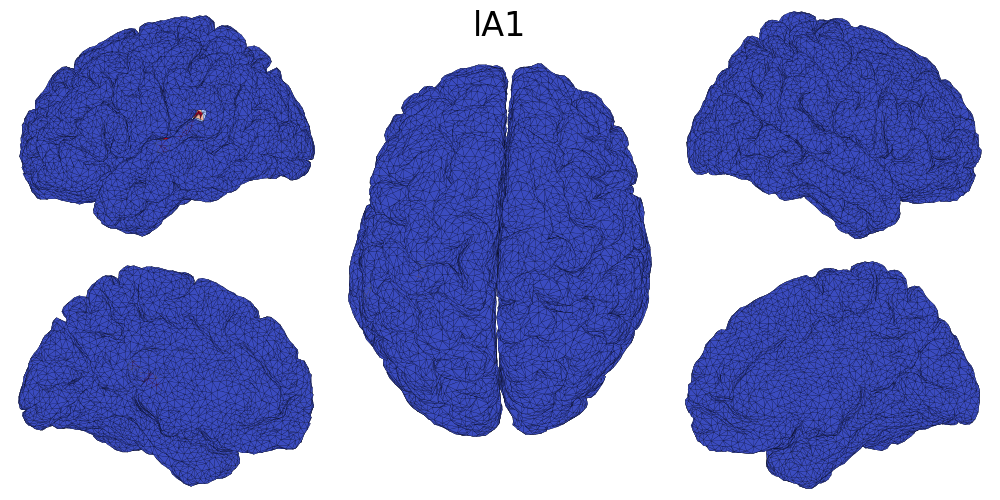

In [77]:
# %matplotlib widget
import utils

print(conn.ordered_labels)

reg_names = 'lA1'
c_ = np.zeros((n_points,))

for i, reg_name in enumerate(reg_names.split()):
    roi = list(conn.ordered_labels).index(reg_name)
    c_[rm == roi] = 1
    print(roi)
    print(c_.sum())
utils.multiview(c_, cortex=ctx, shaded=False, suptitle=reg_name, figsize=(10, 5))

    

/var/folders/rk/r2pzgyrs5131skw99t_c531c0000gn/T/ipykernel_63734/506623897.py:7: RuntimeWarning: divide by zero encountered in arctanh
  cs_z = np.arctanh(cs)
/Users/aveloz/miniconda3/envs/hrf/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:563: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
/var/folders/rk/r2pzgyrs5131skw99t_c531c0000gn/T/ipykernel_63734/506623897.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.subplot(122), plt.imshow(np.log10(p)*(p < 0.05), cmap='gray', interpolation='none');


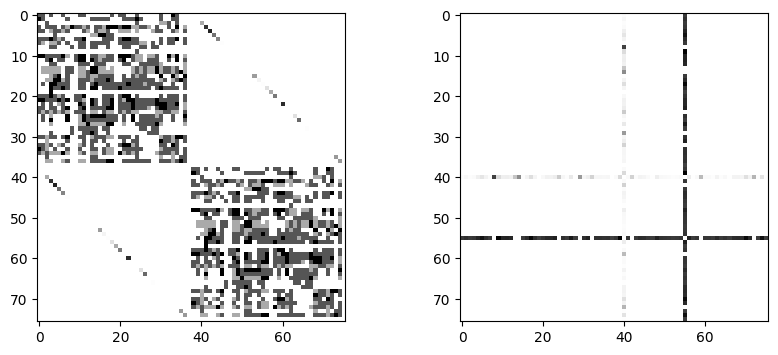

(76, 76)
(16384,)
(76, 76)
(16384,)
(76, 76)
(16384,)


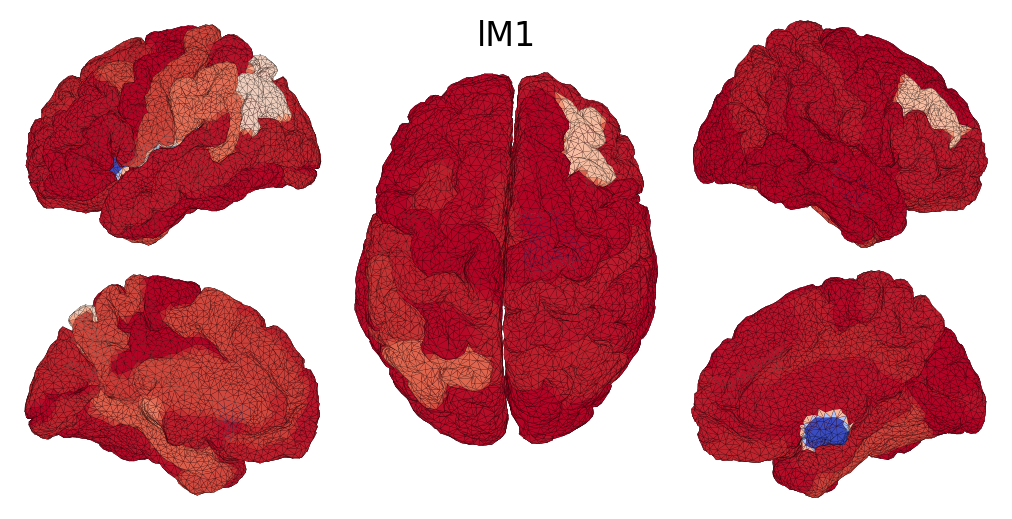

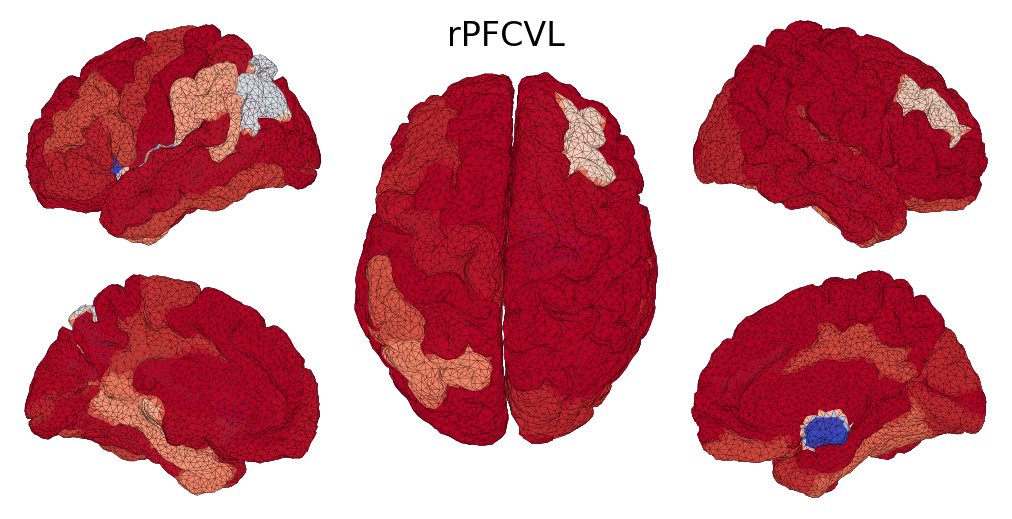

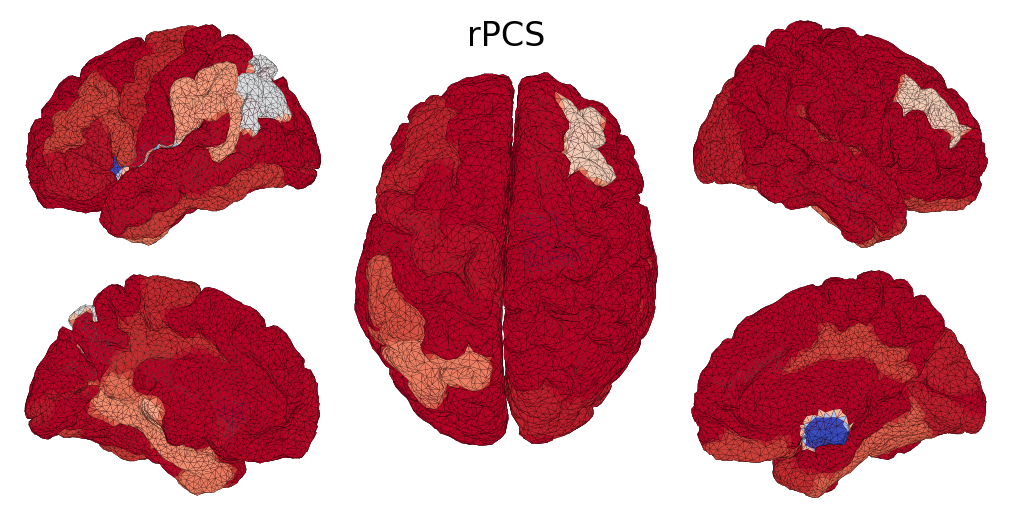

In [22]:
import scipy
cs = []
for i in range(int(t[-1]/10)):
    cs.append(np.corrcoef(y[(t>(i*10))*(t<(10*(i+1)))].T))
cs = np.array(cs)
cs.shape
cs_z = np.arctanh(cs)
for i in range(cs.shape[1]):
    cs_z[:, i, i] = 0.0
_, p = scipy.stats.ttest_1samp(cs, 0.0)

plt.figure(figsize=(10, 4))
plt.subplot(121), plt.imshow(conn.weights, cmap='binary', interpolation='none')
plt.subplot(122), plt.imshow(np.log10(p)*(p < 0.05), cmap='gray', interpolation='none');
plt.show()

ctx = cortex.Cortex.from_file()
ctx.region_mapping_data.connectivity = conn
rm = ctx.region_mapping

import utils

def plot_roi_corr_map(reg_name):
    roi = list(conn.ordered_labels).index(reg_name)
    cs_m = cs[2:].mean(axis=0)
    print(cs_m.shape)
    c_ = cs_m[roi,rm]
    print(c_.shape)
    utils.multiview(cs_m[roi][rm], cortex=ctx, shaded=False, suptitle=reg_name, figsize=(10, 5))

for reg in 'lM1 rPFCVL rPCS'.split():
    plot_roi_corr_map(reg)

In [24]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=5, max_iter=250)
ica.fit(y)

FastICA(max_iter=250, n_components=5)

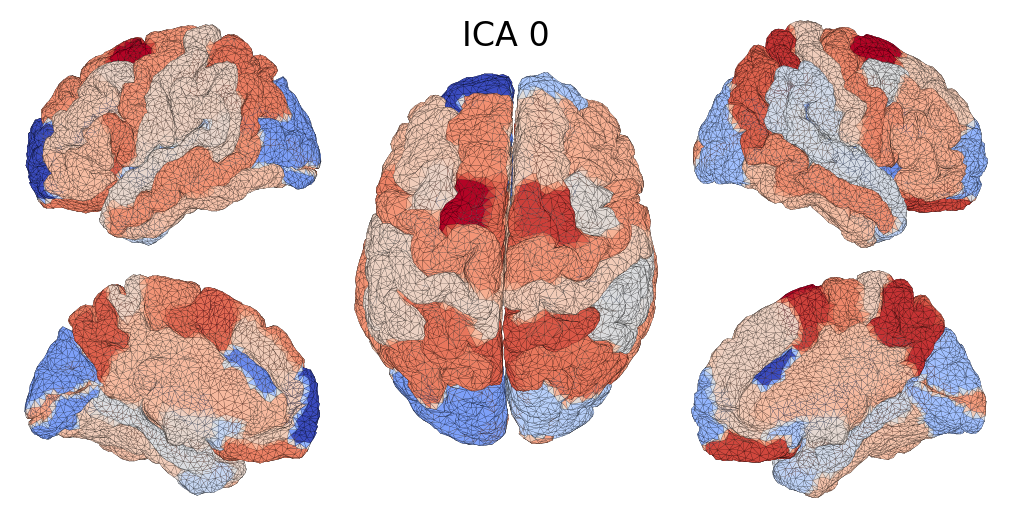

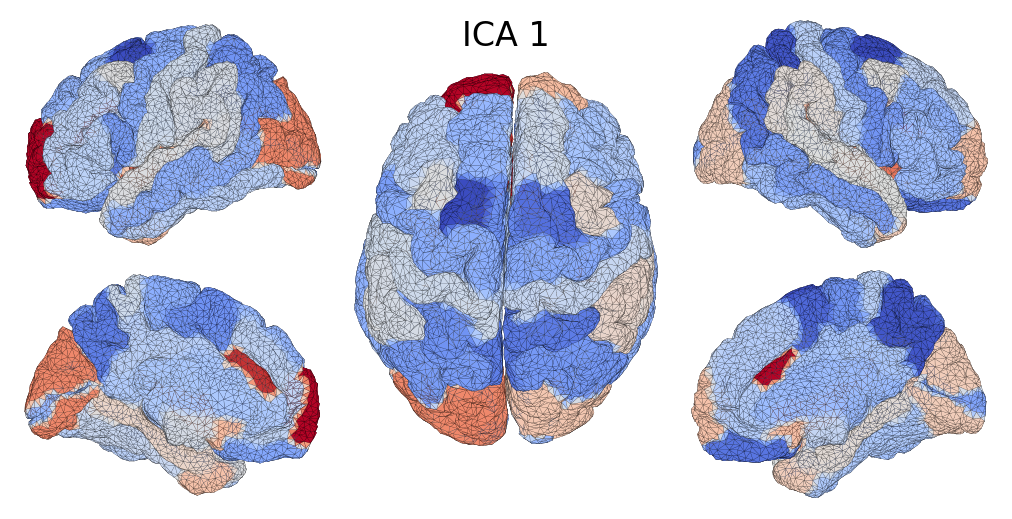

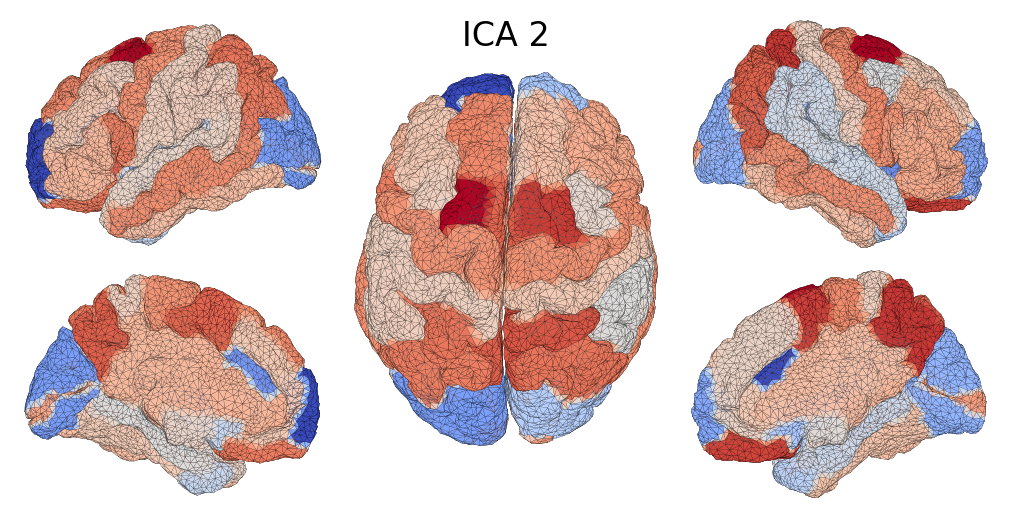

In [25]:
import matplotlib.pyplot as plt
for i, comp in enumerate(ica.components_[:3]):
    utils.multiview(comp[rm], cortex=ctx, shaded=False, suptitle='ICA %d' % (i, ), figsize=(10, 5))
plt.show()